# Demo 06 - Transforming and Comparing Data

In this notebook we do a few things with the [NBA Salary Dataset](https://github.com/joshrosson/NBASalaryPredictions) to illustrate working on relationships between variables as well as transforming a few of those variables using the standard methods in Pandas.


In [ ]:
# first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
# Startup Magic to: (1) Mount Google Drive
# (2) Change to Course Folder
# (3) Pull latest Changes
# (4) Move to the Demo Directory so that the data files are available

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/cmps3160
!git pull
%cd _demos

In [26]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load Stats
from scipy import stats
import seaborn as sns

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Loading the Data and Checking Skew

First up we need to open up this data and get it loaded. You'll see there are lots of different stats in different columns.

In [27]:
# Load the data
# Data from here: https://github.com/joshrosson/NBASalaryPredictions
df_nba = pd.read_csv("./data/nba_stats.csv")
display(df_nba.head(10))

# Always double check your Dtypes
df_nba.dtypes

,Season,Name,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1995,A.C. Green,6473000.00,SF,31,PHO,82,52,2687,311,617,0.50,43,127,0.34,268,490,0.55,251,343,0.73,194,475,669,127,55,31,114,146,916
1,1995,Aaron McKie,845000.00,SG,22,POR,45,20,827,116,261,0.44,11,28,0.39,105,233,0.45,50,73,0.69,35,94,129,89,36,16,39,97,293
2,1995,Aaron Swinson,nan,SF,24,PHO,9,0,51,10,18,0.56,0,0,nan,10,18,0.56,4,5,0.80,3,5,8,3,1,0,5,8,24
3,1995,Aaron Williams,nan,PF,23,MIL,15,0,72,8,24,0.33,0,1,0.00,8,23,0.35,8,12,0.67,5,14,19,0,2,6,7,14,24
4,1995,Acie Earl,1040000.00,C,24,BOS,30,3,208,26,68,0.38,0,0,nan,26,68,0.38,14,29,0.48,19,26,45,2,6,8,14,39,66
5,1995,Adam Keefe,1650000.00,SF,24,UTA,75,0,1270,172,298,0.58,0,0,nan,172,298,0.58,117,173,0.68,135,192,327,30,36,25,62,141,461
6,1995,Adrian Caldwell,225000.00,PF,28,HOU,7,0,30,1,4,0.25,0,0,nan,1,4,0.25,3,6,0.50,1,9,10,0,1,0,1,6,5
7,1995,Alaa Abdelnaby,nan,PF,26,TOT,54,0,506,118,231,0.51,0,2,0.00,118,229,0.52,20,35,0.57,37,77,114,13,15,12,45,104,256
8,1995,Alaa Abdelnaby,nan,PF,26,SAC,51,0,476,117,220,0.53,0,2,0.00,117,218,0.54,20,35,0.57,34,72,106,13,15,12,40,102,254
9,1995,Alaa Abdelnaby,nan,PF,26,PHI,3,0,30,1,11,0.09,0,0,nan,1,11,0.09,0,0,nan,3,5,8,0,0,0,5,2,2


Season      int64
Name       object
Salary    float64
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [36]:
# There's a lot here, let's work only with the 2017 data since that is the most recent
df_2017nba = df_nba[(df_nba["Season"] == 2017)][["Name", "Salary", "Pos", "Age", "MP", "PTS","TRB", "AST"]]
df_2017nba.head(10)

,Name,Salary,Pos,Age,MP,PTS,TRB,AST
12234,A.J. Hammons,1312611.00,C,24,163,48,36,4
12235,Aaron Brooks,2116955.00,PG,32,894,322,69,125
12236,Aaron Gordon,5504420.00,SF,21,2298,1019,405,150
12237,Aaron Harrison,nan,SG,22,17,1,3,3
12238,Adreian Payne,nan,PF,25,135,63,33,7
12239,Al Horford,27734405.00,C,30,2193,952,464,337
12240,Al Jefferson,9769821.00,C,32,931,535,278,57
12241,Al-Farouq Aminu,7319035.00,SF,26,1773,532,451,99
12242,Alan Anderson,nan,SF,34,308,86,24,11
12243,Alan Williams,6000000.00,C,24,708,346,292,23


The First thing we might want to do (and we've seen before) is just applying a function to a column, or even making a new column as the output of such a function. Let's make a column that's the average of the counting stats (Points, Rebounds, and Assists) for each player.

In [52]:
(df_2017nba["PTS"] + df_2017nba["TRB"] + df_2017nba["AST"]) / 3.0

12234    29.33
12235   172.00
12236   524.67
12237     2.33
12238    34.33
         ...  
12824    27.67
12825   220.67
12826   395.67
12827   582.67
12828   322.67
Length: 595, dtype: float64

In [55]:
# Tricky, is this is error? Why not?
df_2017nba["AvgCount"] = (df_2017nba["PTS"] + df_2017nba["TRB"] + df_2017nba["AST"]) / 3.0
df_2017nba

,Name,Salary,Pos,Age,MP,PTS,TRB,AST,AvgCount
12234,A.J. Hammons,1312611.00,C,24,163,48,36,4,29.33
12235,Aaron Brooks,2116955.00,PG,32,894,322,69,125,172.00
12236,Aaron Gordon,5504420.00,SF,21,2298,1019,405,150,524.67
12237,Aaron Harrison,nan,SG,22,17,1,3,3,2.33
12238,Adreian Payne,nan,PF,25,135,63,33,7,34.33
...,...,...,...,...,...,...,...,...,...
12824,Yogi Ferrell,1312611.00,PG,23,151,54,12,17,27.67
12825,Yogi Ferrell,1312611.00,PG,23,1046,408,99,155,220.67
12826,Zach LaVine,3202217.00,SG,21,1749,889,159,139,395.67
12827,Zach Randolph,12307692.00,PF,35,1786,1028,598,122,582.67


Let's turn back to the question of Skew... is the salary data skewed for these players?

I'm going to use Seaborn functions, just for fun. First up is the [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

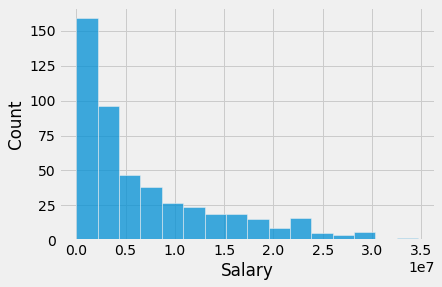

In [37]:
# First, let's visualize the salary data.
sns.histplot(df_2017nba["Salary"])

Is this data skewed? If so, which direction is it skewed? What does this tell us about the Mean and the Median?

In [38]:
df_2017nba["Salary"].describe()

count        487.00
mean     7220412.99
std      7331405.75
min        17224.00
25%      1638840.00
50%      4078320.00
75%     10660727.50
max     34682550.00
Name: Salary, dtype: float64

We learned about the ladder of powers to transform the data.

$$ x(\lambda) = \begin{cases} x^\lambda & \lambda > 0 \\  \log(x) & \lambda = 0 \\ -x^\lambda & \lambda < 0 \end{cases} $$

$\lambda = 1$ corresponds to no transformation at all. As we decrease $\lambda$, the distribution becomes more left-skewed (which is useful if the original distribution was right-skewed).

But what do these functions look like?

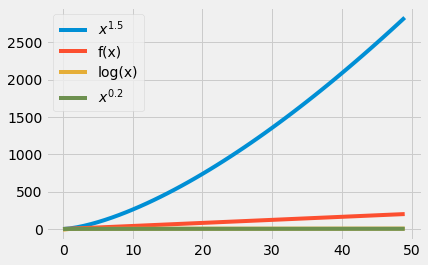

In [49]:
# Transformation functions..
x = np.linspace(0.0001, 200, 50)
plt.plot(x**1.5, label="$x^{1.5}$")
plt.plot(x**1, label="f(x)")
plt.plot(np.log(x), label="log(x)")
plt.plot(x**0.2, label="$x^{0.2}$")
plt.legend(loc='best')


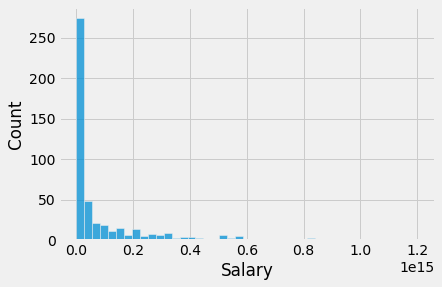

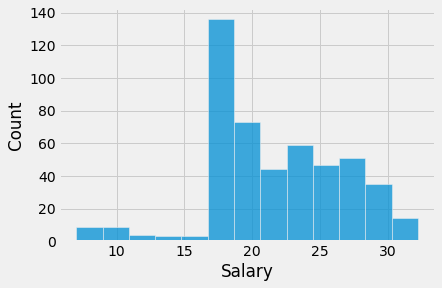

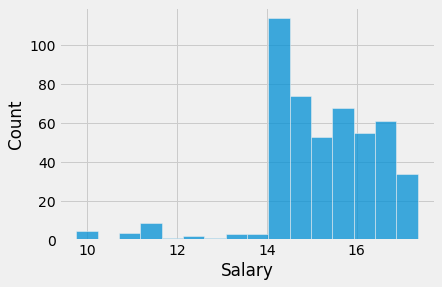

In [62]:
# Apply a few functions...
sns.histplot(df_2017nba['Salary']**2)
plt.show()

sns.histplot(df_2017nba['Salary']**0.2)
plt.show()

sns.histplot(np.log(df_2017nba['Salary']))
plt.show()


## Why Do We Unskew our data?

Having very skewed data can make it hard to see what relationships may exist in our data. But for now let's investigage the relationship between Salary and how many points players scores.


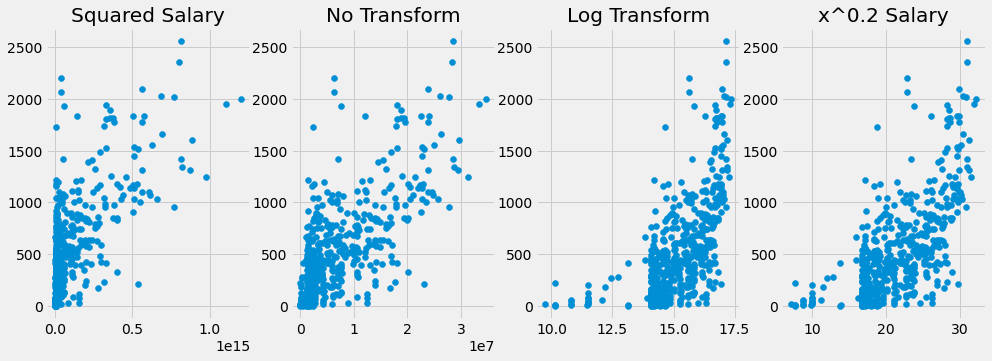

In [63]:
# Uskewing the data can help us to see relationships.
# Try 2, 1, 0.2

# We'll use subplots to make this easier just for fun...
fig, ax = plt.subplots(1, 4, figsize=(15,5))

#df_nba.plot.scatter(x=(df_nba['Salary']**2.0), y=df_nba['PTS'], ax=ax[0])

ax[0].scatter((df_2017nba['Salary']**2.0), df_2017nba['PTS'])
ax[0].title.set_text("Squared Salary")
ax[1].scatter((df_2017nba['Salary']**1.0), df_2017nba['PTS'])
ax[1].title.set_text("No Transform")
ax[2].scatter((np.log(df_2017nba['Salary'])), df_2017nba['PTS'])
ax[2].title.set_text("Log Transform")
ax[3].scatter((df_2017nba['Salary']**0.2), df_2017nba['PTS'])
ax[3].title.set_text("x^0.2 Salary")

## Relationships and Transformations

We've seen how it's possible to unskew our data, let's do a little more EDA to see what relationships might exist in our data.

To do this we can first look at the correlations between the various columns.

In [64]:
df_2017nba.head(10)

,Name,Salary,Pos,Age,MP,PTS,TRB,AST,AvgCount
12234,A.J. Hammons,1312611.00,C,24,163,48,36,4,29.33
12235,Aaron Brooks,2116955.00,PG,32,894,322,69,125,172.00
12236,Aaron Gordon,5504420.00,SF,21,2298,1019,405,150,524.67
12237,Aaron Harrison,nan,SG,22,17,1,3,3,2.33
12238,Adreian Payne,nan,PF,25,135,63,33,7,34.33
12239,Al Horford,27734405.00,C,30,2193,952,464,337,584.33
12240,Al Jefferson,9769821.00,C,32,931,535,278,57,290.00
12241,Al-Farouq Aminu,7319035.00,SF,26,1773,532,451,99,360.67
12242,Alan Anderson,nan,SF,34,308,86,24,11,40.33
12243,Alan Williams,6000000.00,C,24,708,346,292,23,220.33


In [66]:
# Let's look at the correlations...
df_2017nba.corr()

,Salary,Age,MP,PTS,TRB,AST,AvgCount
Salary,1.00,0.23,0.65,0.71,0.59,0.54,0.72
Age,0.23,1.00,0.07,0.04,0.04,0.10,0.05
MP,0.65,0.07,1.00,0.90,0.79,0.72,0.93
PTS,0.71,0.04,0.90,1.00,0.73,0.75,0.98
TRB,0.59,0.04,0.79,0.73,1.00,0.46,0.83
AST,0.54,0.10,0.72,0.75,0.46,1.00,0.79
AvgCount,0.72,0.05,0.93,0.98,0.83,0.79,1.00


<AxesSubplot:>

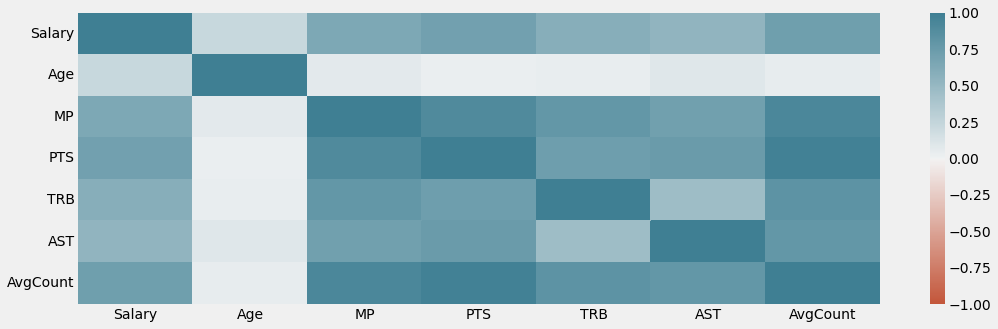

In [68]:
# Compute Some Cross Correlations...
plt.figure(figsize = (16,5))
sns.heatmap(df_2017nba.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

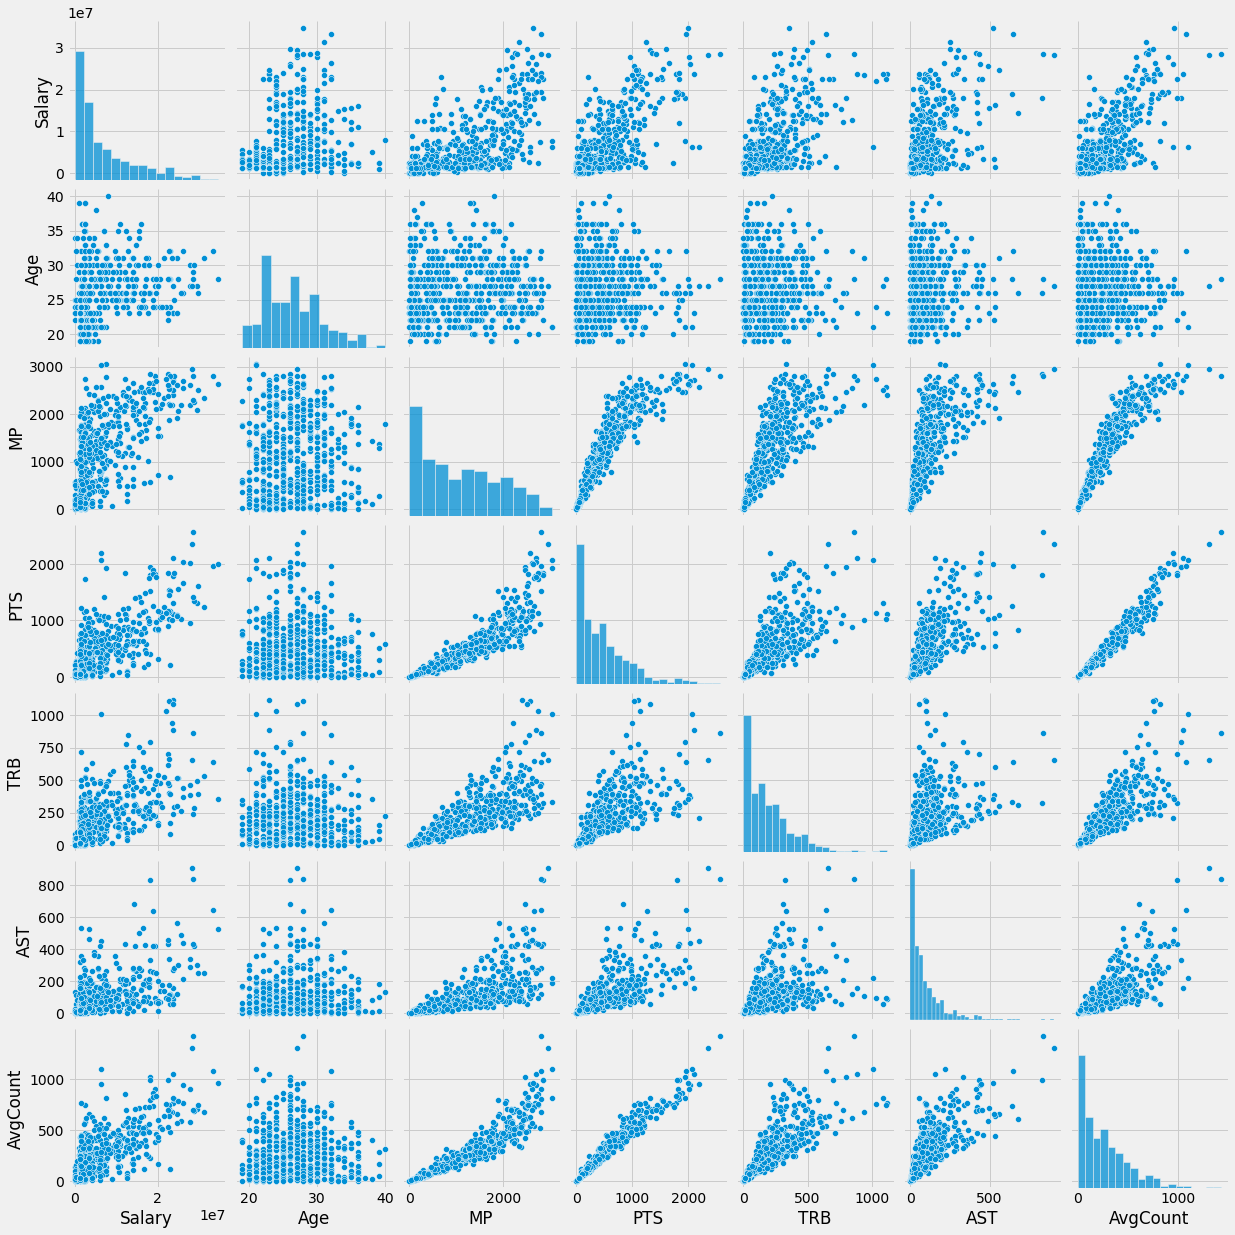

In [69]:
# Or do some really crazy Seaborn stuff.
sns.pairplot(df_2017nba)

### Let's apply the three transforms: P-Score, Z-Score, Normalizing, and making a variable discrete.

We'll do these in order with just a few examples. Let's start with percentile scoring with the Pandas [rank method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html).

In [79]:
# Turn Minutes played into percentile ranks.
df_2017nba["MP Pct"] = df_2017nba[["MP"]].rank(pct=True)
df_2017nba.sort_values(by="MP Pct")

,Name,Salary,Pos,Age,MP,PTS,TRB,AST,AvgCount,MP Pct
12258,Andrew Bogut,2328652.00,C,32,1,0,0,0,0.00,0.00
12358,Danuel House,nan,SG,23,1,0,1,0,0.33,0.00
12412,Edy Tavares,nan,C,24,4,2,1,0,1.00,0.01
12282,Axel Toupane,25000.00,SF,24,6,0,0,0,0.00,0.01
12765,Terrence Jones,nan,PF,25,6,0,3,0,1.00,0.01
...,...,...,...,...,...,...,...,...,...,...
12514,John Wall,18063850.00,PG,26,2836,1805,326,831,987.33,0.99
12437,Giannis Antetokounmpo,22471910.00,SF,22,2845,1832,700,434,988.67,0.99
12471,James Harden,28299399.00,PG,27,2947,2356,659,906,1307.00,1.00
12551,Karl-Anthony Towns,6216840.00,C,21,3030,2061,1007,220,1096.00,1.00


We could standardize the hard way (How?) but we can also do it the easy way using [Scipy Stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

In [87]:
df_2017nba["Std MP"] = stats.zscore(df_2017nba["MP"])
df_2017nba

,Name,Salary,Pos,Age,MP,PTS,TRB,AST,AvgCount,MP Pct,Std MP
12234,A.J. Hammons,1312611.00,C,24,163,48,36,4,29.33,0.17,-1.11
12235,Aaron Brooks,2116955.00,PG,32,894,322,69,125,172.00,0.48,-0.24
12236,Aaron Gordon,5504420.00,SF,21,2298,1019,405,150,524.67,0.90,1.45
12237,Aaron Harrison,nan,SG,22,17,1,3,3,2.33,0.03,-1.29
12238,Adreian Payne,nan,PF,25,135,63,33,7,34.33,0.15,-1.15
...,...,...,...,...,...,...,...,...,...,...,...
12824,Yogi Ferrell,1312611.00,PG,23,151,54,12,17,27.67,0.16,-1.13
12825,Yogi Ferrell,1312611.00,PG,23,1046,408,99,155,220.67,0.51,-0.05
12826,Zach LaVine,3202217.00,SG,21,1749,889,159,139,395.67,0.74,0.79
12827,Zach Randolph,12307692.00,PF,35,1786,1028,598,122,582.67,0.76,0.83


In [88]:
# Z-standardize and replot.
df_2017nba['std_salary'] = (df_2017nba['Salary'] - df_2017nba['Salary'].mean()) / df_2017nba['Salary'].std()
df_2017nba['std_pts'] = (df_2017nba['PTS'] - df_2017nba['PTS'].mean()) / df_2017nba['PTS'].std()

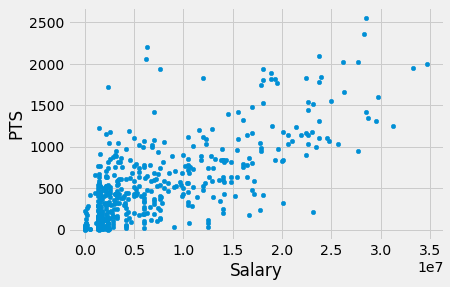

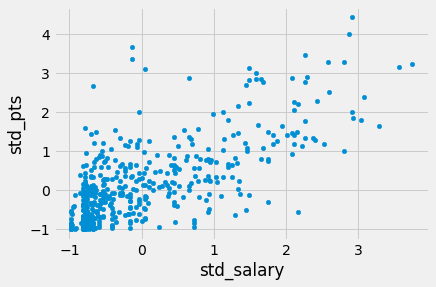

In [90]:
# Plot Salary v. Assists..
# Can see a bit more distribution and units are interpretable!
df_2017nba.plot.scatter(x='Salary', y='PTS')
df_2017nba.plot.scatter(x='std_salary', y='std_pts')
plt.show()

In the next demo we'll learn a bit more about these, why they're important, and what they can be used for. For now let's finish up with turning Position into a one-hot encoded variable.

In [91]:
# get dummies
df_ml = pd.get_dummies(df_2017nba[['Pos', 'Salary', 'PTS', 'TRB']])
df_ml

,Salary,PTS,TRB,Pos_C,Pos_PF,Pos_PF-C,Pos_PG,Pos_SF,Pos_SG
12234,1312611.00,48,36,1,0,0,0,0,0
12235,2116955.00,322,69,0,0,0,1,0,0
12236,5504420.00,1019,405,0,0,0,0,1,0
12237,nan,1,3,0,0,0,0,0,1
12238,nan,63,33,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12824,1312611.00,54,12,0,0,0,1,0,0
12825,1312611.00,408,99,0,0,0,1,0,0
12826,3202217.00,889,159,0,0,0,0,0,1
12827,12307692.00,1028,598,0,1,0,0,0,0
